In [1]:
import sys
sys.path.append("../")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mempred import *

ver()

This is mempred version 1.2: Trixie
Latest feature: integrate memtools


### Butane Dihedral Angle

In [2]:
trj=np.loadtxt("example.trj")

xf=xframe(trj[:,1],trj[:,0],fix_time=True)
xvaf=compute_va(xf,correct_jumps=True)

xvaf.head()

,t,x,v,a
#t,,,,
0.01,0.01,-167.663620,58.356476,-16591.949463
0.02,0.02,-167.909653,-99.416351,-14962.615967
0.03,0.03,-169.651947,-231.244659,-11403.045654
0.04,0.04,-172.534546,-324.655914,-7279.205322
0.05,0.05,-176.145065,-376.123810,-3014.373779


Found trajectories with the following lengths:
[99998]
Calculate vv, va and aa correlation functions...


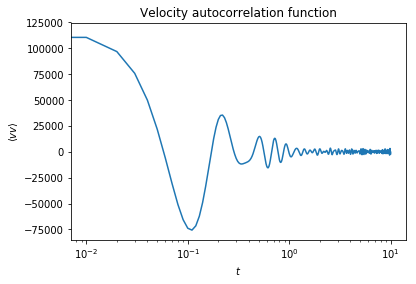

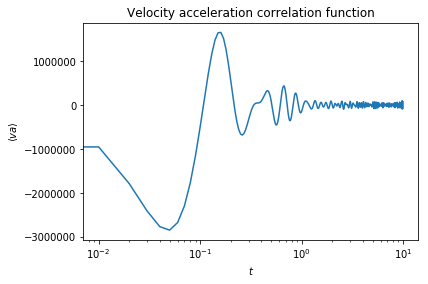

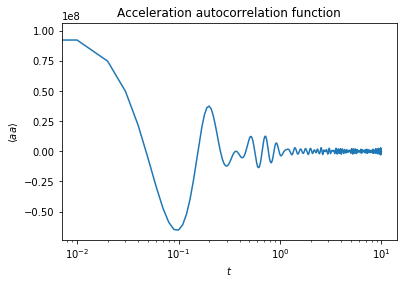

Calculate histogram...
Number of bins: 35
Interpolate... (ignore p=0!)
Assume PERIODIC data.


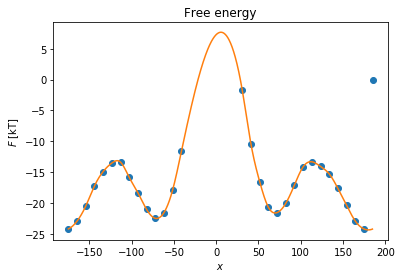

Calculate a/v grad(U(x)) correlation function...


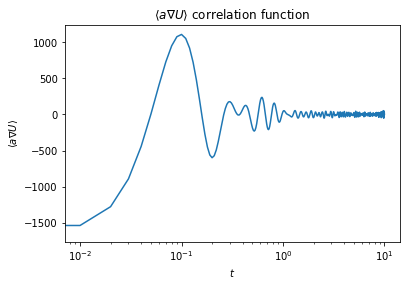

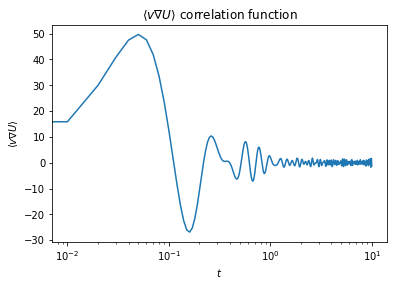

Mass not calculated.
Calculate mass...
Use kT: 2.494
Found mass: 2.1659893685362503e-05
Use dt: 0.01


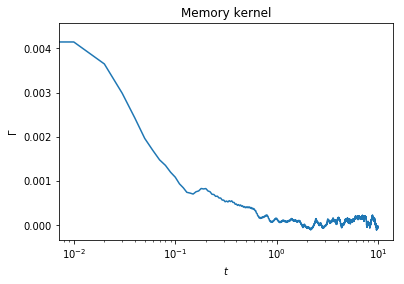

Use dt: 0.01


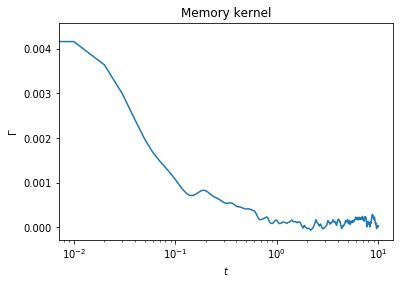

In [4]:
# IglePlot adds verbose plots to Igle, otherwise equivalent
# If you need tab completion for development, use Igle
#mymem=Igle(xvaf,trunc=10)
mymem=IglePlot(xvaf,trunc=10)

mymem.compute_corrs()
mymem.set_periodic(x0=-180,x1=180)
mymem.compute_fe(bins=36)
mymem.compute_u_corr()

kernel=mymem.compute_kernel()
kernel_2nd=mymem.compute_kernel(first_order = False)

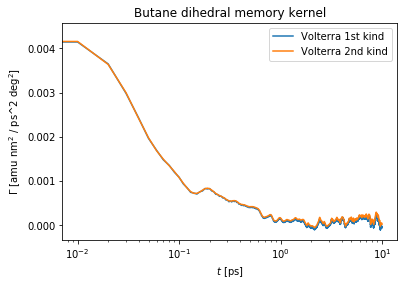

In [5]:
plt.plot(kernel.index,kernel['k'], label="Volterra 1st kind")
plt.plot(kernel.index,kernel_2nd['k'], label="Volterra 2nd kind")
plt.title("Butane dihedral memory kernel")
plt.xscale("log")
plt.xlabel("$t$ [ps]")
plt.ylabel("$\\Gamma$ [amu nm$^2$ / ps^2 deg$^2$]")
plt.legend(loc='best')    
plt.show()


### Weather Berlin

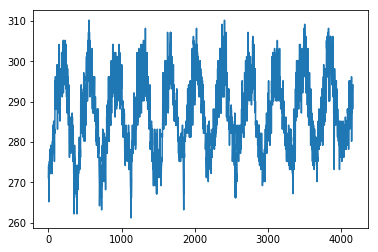

In [2]:
#data = pd.read_csv('berlin.csv')
data = pd.read_csv('/net/grouphome/ag-netz/projects/mempred/data/tegel_berlin.csv')
data.head()
data['maxtempC'].plot()

xf=xframe(data['maxtempC'],data.index,fix_time=True)
xvaf=compute_va(xf,correct_jumps=True)


Found trajectories with the following lengths:
[4163]
Calculate vv, va and aa correlation functions...


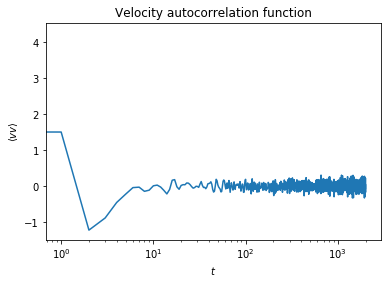

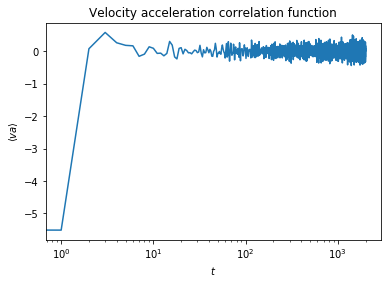

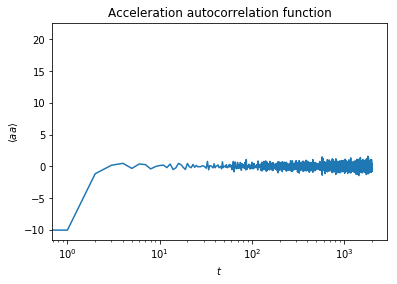

Calculate histogram...
Number of bins: 36
Interpolate... (ignore p=0!)
Assume NON-PERIODIC data.


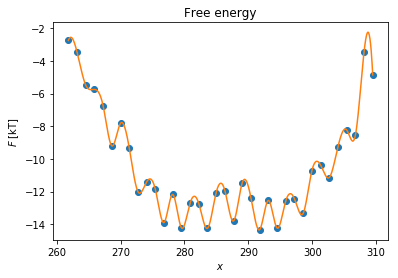

Calculate a/v grad(U(x)) correlation function...


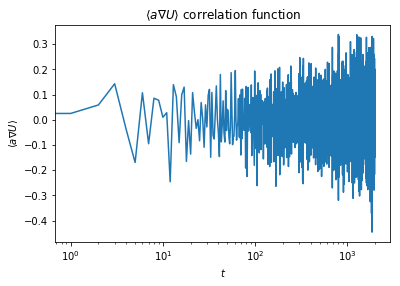

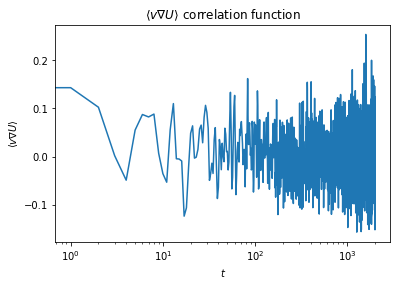

Mass not calculated.
Calculate mass...
Use kT: 2.494
Found mass: 0.5851863207879496
Use dt: 1.0


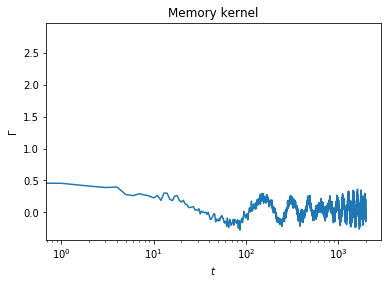

In [7]:
# IglePlot adds verbose plots to Igle, otherwise equivalent
# If you need tab completion for development, use Igle
#mymem=Igle(xvaf,trunc=10)
mymem=IglePlot(xvaf,trunc=2000,kT=2.494)

mymem.compute_corrs()
mymem.compute_fe(bins=36)
mymem.compute_u_corr()

kernel=mymem.compute_kernel(first_order=True)

In [8]:
kernel['k'][0]

2.818321838703516